### Load and Explore the Data

Load the data

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Display first few rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


rename the headers to meaningful header

In [24]:
# Rename columns for clarity
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

# Drop unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

# Display first few rows
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Spam VS Ham Distribution Pie chart

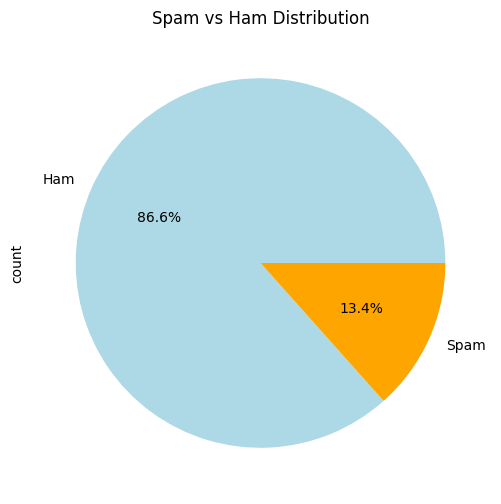

In [26]:
# Visualize Spam vs. Ham distribution using a pie chart
plt.figure(figsize=(6, 6))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Ham', 'Spam'], colors=['lightblue', 'orange'])
plt.title('Spam vs Ham Distribution')
plt.show()

Word cloud for spam words

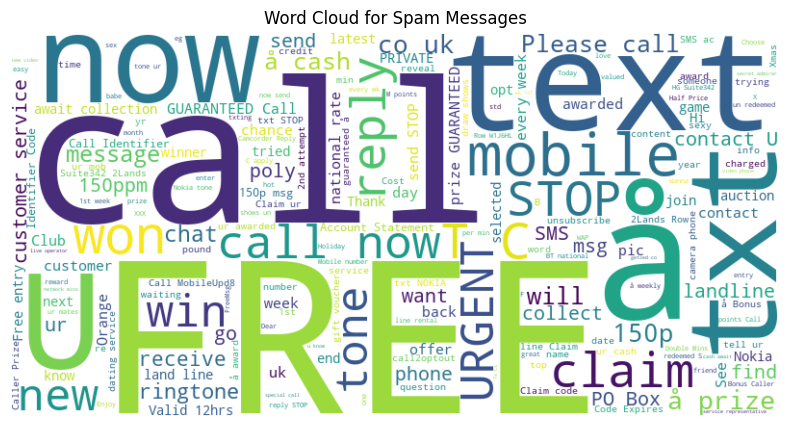

In [27]:
# Create a word cloud for spam words
spam_text = " ".join(df[df['label'] == 'spam']['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

Statistics value for Spam & Ham messages

In [28]:
from IPython.display import display

# Function to count characters, words, and sentences in a message
def message_stats(text):
    return pd.Series([len(text), len(text.split()), len(text.split('.'))])

# Apply function to dataset
df[['num_characters', 'num_words', 'num_sentences']] = df['message'].apply(message_stats)

# Separate statistics for spam and ham messages
spam_stats = df[df['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()
ham_stats = df[df['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

spam_stats, ham_stats

# Display spam and ham statistics in table format
print("📌 **Spam Messages Statistics**")
display(spam_stats)

print("\n📌 **Ham Messages Statistics**")
display(ham_stats)

📌 **Spam Messages Statistics**


,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN



📌 **Ham Messages Statistics**


,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


## Visualizations

### Boxplot for num_characters

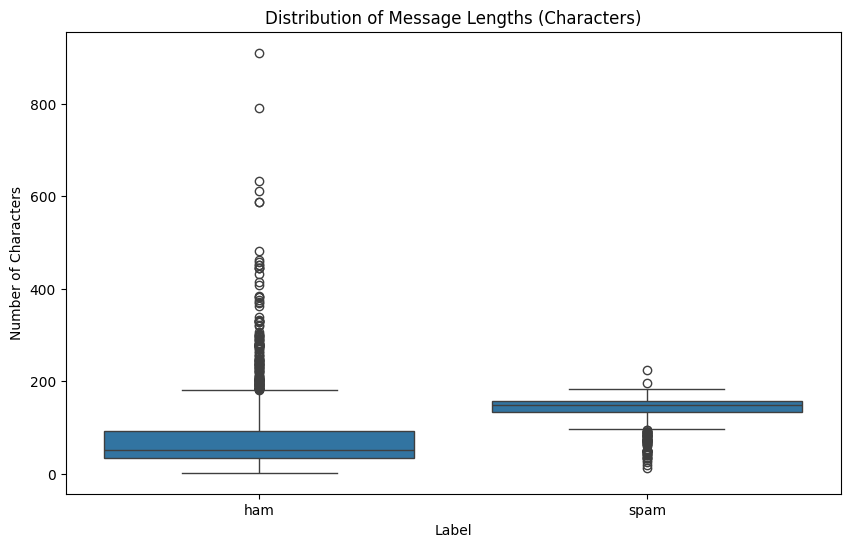

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for num_characters
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='num_characters', data=df)
plt.title('Distribution of Message Lengths (Characters)')
plt.xlabel('Label')
plt.ylabel('Number of Characters')
plt.show()

###  Distribution of Spam vs. Ham Messages

C:\Users\bibek\AppData\Local\Temp\ipykernel_20880\2199823212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette=['lightblue', 'orange'])


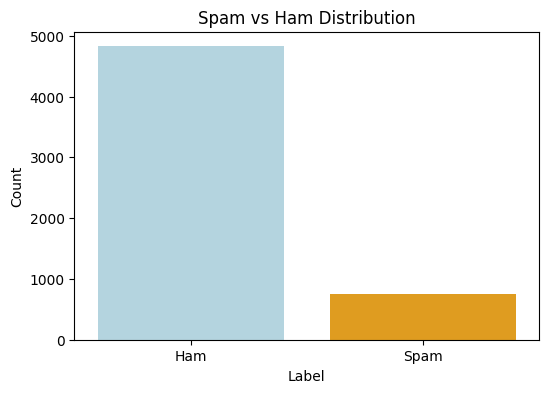

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for Spam vs. Ham distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette=['lightblue', 'orange'])
plt.title('Spam vs Ham Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

### Distribution of Message Lengths
Visualize the distribution of num_characters, num_words, and num_sentences using histograms

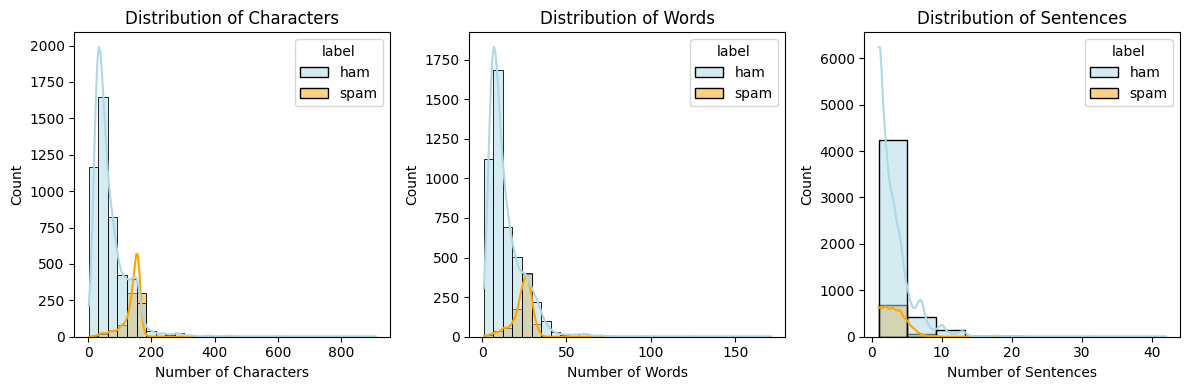

In [31]:
# Histogram for num_characters
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='num_characters', hue='label', bins=30, kde=True, palette=['lightblue', 'orange'])
plt.title('Distribution of Characters')
plt.xlabel('Number of Characters')

# Histogram for num_words
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='num_words', hue='label', bins=30, kde=True, palette=['lightblue', 'orange'])
plt.title('Distribution of Words')
plt.xlabel('Number of Words')

# Histogram for num_sentences
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='num_sentences', hue='label', bins=10, kde=True, palette=['lightblue', 'orange'])
plt.title('Distribution of Sentences')
plt.xlabel('Number of Sentences')

plt.tight_layout()
plt.show()

###  Relationship Between Features
Use pair plots to visualize the relationship between num_characters, num_words, and num_sentences.

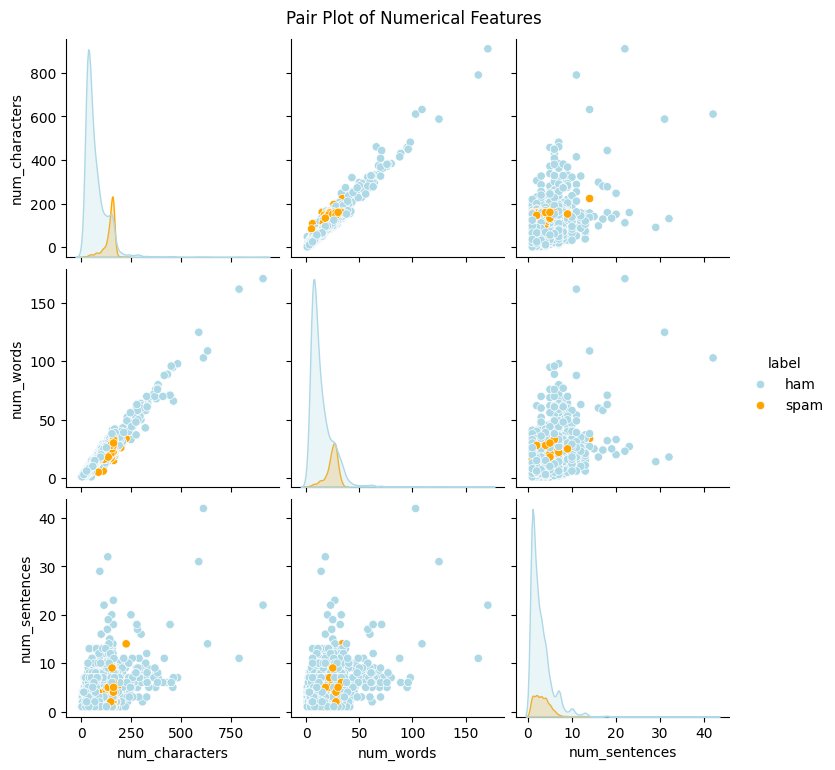

In [32]:
# Pair plot for all numerical features
sns.pairplot(data=df[['num_characters', 'num_words', 'num_sentences', 'label']], hue='label', palette=['lightblue', 'orange'])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

### Sentiment Analysis Visualization
If you compute sentiment scores (e.g., positive, negative, neutral), you can visualize them using bar charts.

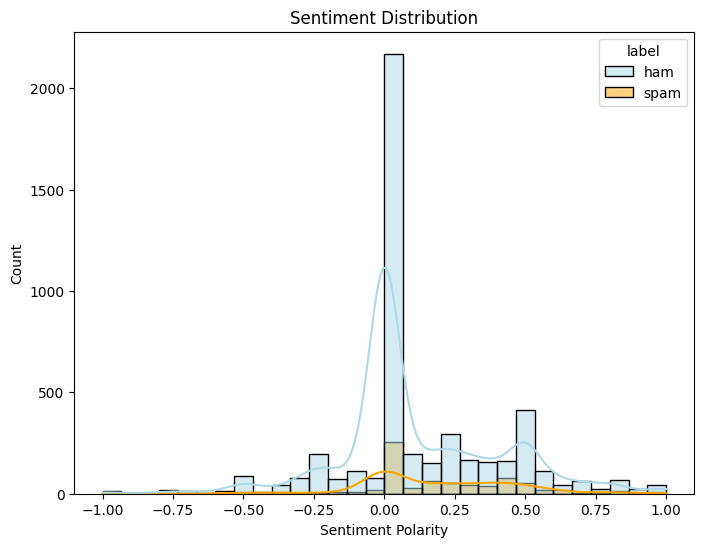

In [33]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['message'].apply(get_sentiment)

# Sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sentiment', hue='label', bins=30, kde=True, palette=['lightblue', 'orange'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.show()

###  Heatmap of Correlations
Visualize the correlation between numerical features (num_characters, num_words, num_sentences) using a heatmap.

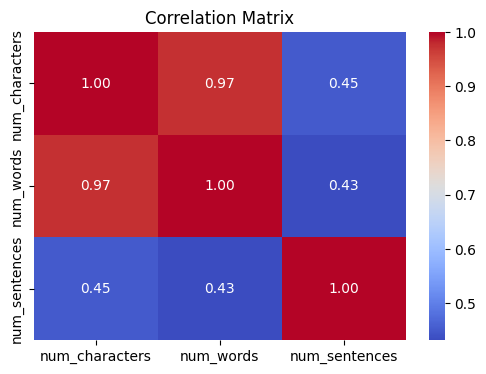

In [34]:
# Correlation matrix
correlation_matrix = df[['num_characters', 'num_words', 'num_sentences']].corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Proportion of Special Characters
Calculate and visualize the proportion of special characters (e.g., !, ?, $) in spam and ham messages.

C:\Users\bibek\AppData\Local\Temp\ipykernel_20880\4222898837.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='num_special_chars', palette=['lightblue', 'orange'])


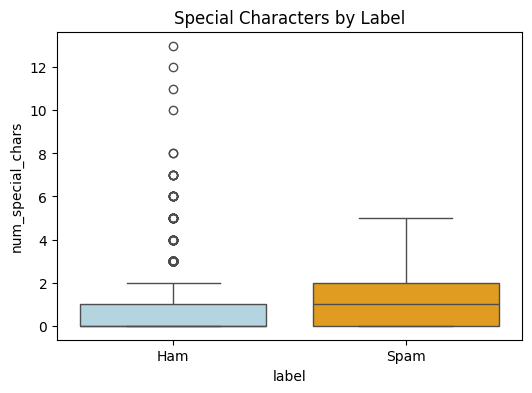

In [35]:
import re

# Function to count special characters
def count_special_chars(text):
    return len(re.findall(r'[!?]', text))

df['num_special_chars'] = df['message'].apply(count_special_chars)

# Boxplot of special characters
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='label', y='num_special_chars', palette=['lightblue', 'orange'])
plt.title('Special Characters by Label')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

## Preprocessing Data

Check for missing values and duplicates

In [36]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Convert labels to numeric values (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check for missing values and duplicates
print("Missing Values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify dataset after cleaning
df_info_after = {
    "Total Rows (After Cleanup)": df.shape[0],
    "Duplicate Rows (After Cleanup)": df.duplicated().sum()
}

df_info_after

Missing Values:
 label                0
message              0
num_characters       0
num_words            0
num_sentences        0
sentiment            0
num_special_chars    0
dtype: int64
Duplicates: 403


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bibek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'Total Rows (After Cleanup)': 5169,
 'Duplicate Rows (After Cleanup)': np.int64(0)}

Text preprocessing

In [37]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Stopword removal
    return text

# Apply preprocessing
df['clean_message'] = df['message'].apply(preprocess_text)


# Summarize the dataset
print(df.head())
display(df.head())


   label                                            message  num_characters  \
0      0  Go until jurong point, crazy.. Available only ...             111   
1      0                      Ok lar... Joking wif u oni...              29   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3      0  U dun say so early hor... U c already then say...              49   
4      0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  sentiment  num_special_chars  \
0         20              9       0.15                  0   
1          6              7       0.50                  0   
2         28              2       0.30                  0   
3         11              7       0.10                  0   
4         13              1       0.00                  0   

                                       clean_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u

,label,message,num_characters,num_words,num_sentences,sentiment,num_special_chars,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,0.15,0,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,6,7,0.50,0,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,0.30,0,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,11,7,0.10,0,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,0.00,0,nah dont think goes usf lives around though


Feature extraction using TF-IDF

In [38]:

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=3000)  # Limit to top 3000 features
X = tfidf.fit_transform(df['clean_message']).toarray()
y = df['label'].values

# Shape of transformed data
# X.shape


## Training and Testing

Split the data into training and testing sets

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




Train multiple models

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train multiple models
models = {
    'Naïve Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Lasso Logistic": LogisticRegression(solver='liblinear', penalty='l1'),
    "Random Forest (50)": RandomForestClassifier(n_estimators=50, random_state=2)
    # "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=2),
    # "Bagging": BaggingClassifier(n_estimators=50, random_state=2),
    # "Extra Trees": ExtraTreesClassifier(n_estimators=50, random_state=2),
    # "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=2),
    # "XGBoost": XGBClassifier(n_estimators=50, random_state=2)
}

results = {}
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy: {cv_scores.mean():.4f}")
    
    # Train and evaluate
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Compare model performance
results_df = pd.DataFrame(results).T
print(results_df)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
display(results_df)

# it takes around 2 minutes



Naïve Bayes CV Accuracy: 0.9727
Logistic Regression CV Accuracy: 0.9475
Random Forest CV Accuracy: 0.9715
SVM CV Accuracy: 0.9775
KNN CV Accuracy: 0.9120
Decision Tree CV Accuracy: 0.9391
Lasso Logistic CV Accuracy: 0.9463
Random Forest (50) CV Accuracy: 0.9681
                     Accuracy  Precision    Recall  F1 Score
Naïve Bayes          0.976789   0.990826  0.824427  0.900000
Logistic Regression  0.952611   0.976744  0.641221  0.774194
Random Forest        0.973888   0.981481  0.809160  0.887029
SVM                  0.974855   0.964602  0.832061  0.893443
KNN                  0.904255   1.000000  0.244275  0.392638
Decision Tree        0.933269   0.803922  0.625954  0.703863
Lasso Logistic       0.953578   0.946237  0.671756  0.785714
Random Forest (50)   0.970019   0.946429  0.809160  0.872428


,Accuracy,Precision,Recall,F1 Score
Naïve Bayes,0.976789,0.990826,0.824427,0.900000
SVM,0.974855,0.964602,0.832061,0.893443
Random Forest,0.973888,0.981481,0.809160,0.887029
Random Forest (50),0.970019,0.946429,0.809160,0.872428
Lasso Logistic,0.953578,0.946237,0.671756,0.785714
Logistic Regression,0.952611,0.976744,0.641221,0.774194
Decision Tree,0.933269,0.803922,0.625954,0.703863
KNN,0.904255,1.000000,0.244275,0.392638


accuracy and precision

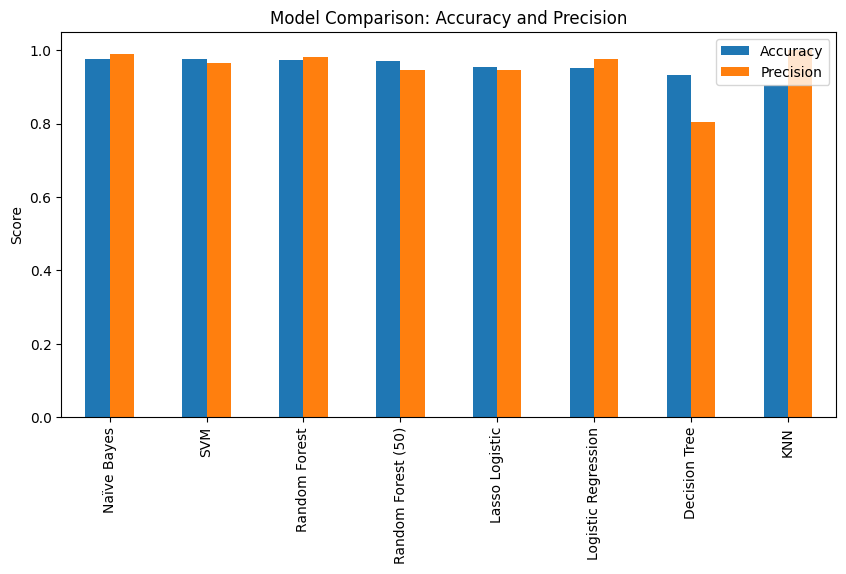

In [46]:
# Plot accuracy and precision
results_df[['Accuracy', 'Precision']].plot(kind='bar', figsize=(10, 5))
plt.title('Model Comparison: Accuracy and Precision')
plt.ylabel('Score')
plt.show()

### Model Evaluation and Selection

In [42]:
# Select the best-performing model based on F1 score
best_model_name = results_df['F1 Score'].idxmax()
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")

# Model interpretability using feature importance (for Random Forest or SVM)
if best_model_name == 'Random Forest':
    feature_importances = best_model.feature_importances_
    feature_names = tfidf.get_feature_names_out()
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    print(importance_df.sort_values(by='Importance', ascending=False).head(10))

Best Model: Naïve Bayes


### Save the Best Model

In [43]:
import joblib

# Save the best model and vectorizer
joblib.dump(best_model, 'spam_detector_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved.")

Model and vectorizer saved.


### Load the Model & Vectorizer

In [2]:
import joblib

# Load the saved model and vectorizer
loaded_model = joblib.load('spam_detector_model.pkl')
loaded_tfidf = joblib.load('tfidf_vectorizer.pkl')

# Example prediction
test_message = """
Congratulations! bibeksha48,You’ve Been Selected! 🎉 Claim Your FREE Car Emergency Kit NOW! ⏳🚨
"""
cleaned_message = preprocess_text(test_message)
vectorized_message = loaded_tfidf.transform([cleaned_message])
prediction = loaded_model.predict(vectorized_message)

print("Spam" if prediction[0] == 1 else "Ham")

NameError: name 'preprocess_text' is not defined

## Detect message by trained model

In [11]:
import joblib

# Load the saved model and vectorizer
loaded_model = joblib.load('spam_detector_model.pkl')
loaded_tfidf = joblib.load('tfidf_vectorizer.pkl')

# Example prediction
test_message = """
Congratulations! You've won a free iPhone 15. Claim now by clicking the link: www.freeiphone.com
"""
cleaned_message = test_message
vectorized_message = loaded_tfidf.transform([cleaned_message])
prediction = loaded_model.predict(vectorized_message)

print("Spam" if prediction[0] == 1 else "Ham")

Spam
